# Congenital Heart Defects Prediction - Logistic Regression
### 21131A1223 IML-Assigment-2
---

## 1. <u>Data Collection </u>

### Importing all the necessary libraries...
    1. numpy for array functions
    2. pandas for reading the data
    3. sklearn for model, metrics

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
accuracy_score,
confusion_matrix,
ConfusionMatrixDisplay,
f1_score,
classification_report
)

### Reading the data from the csv file using pandas...

In [2]:
data = pd.read_csv('./archive/heart_disease.csv')

-------------------------------------------------------------------------------------------------------------------

## 2. <u> Data Visualising</u>

### Checking the data briefly...

    - The dataset has twenty one (16) columns

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


- The dataset has 3168 data samples
- TenYearCHD is to be predicted

In [4]:
data.shape

(4238, 16)

In [5]:
print("Total number of labels: {}".format(data.shape[0]))

Total number of labels: 4238


In [6]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

    The columns education, cigsPerDay, BPMeds, totChol, BMI, heartRate, and glucose 
    have inconsistent null values. 
    Those values can be normalised in the preprocessing.

-------------------------------------------------------------------------------------------------------------------

## 3.  <u> Data Pre-Processing </u>

### Filling the columns with null values with their respective mean value

In [7]:
data.education = data.education.fillna(data.education.mean())
data.BPMeds = data.BPMeds.fillna(data.BPMeds.mean())
data.cigsPerDay = data.cigsPerDay.fillna(data.cigsPerDay.mean())
data.totChol = data.totChol.fillna(data.totChol.mean())
data.BMI = data.BMI.fillna(data.BMI.mean())
data.heartRate = data.heartRate.fillna(data.heartRate.mean())
data.glucose = data.glucose.fillna(data.glucose.mean())

In [8]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

####  All the null and inconsistent values are eliminated

### Seperating features and labels <br>

In [10]:
X = data.iloc[:, :-1]
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [11]:
y = data.iloc[:,-1]
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

### Splitting the dataset into two using sklearn: 
    1. Train Data - 70% of the original data
    2. Test Data - remaining 30% of the original data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
X_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2010,0,42,1.0,1,9.0,0.0,0,1,0,274.0,135.0,90.0,22.19,70.0,81.966753
3340,0,64,1.0,0,0.0,1.0,0,1,0,285.0,160.0,87.0,29.97,65.0,87.000000
3591,0,39,2.0,0,0.0,0.0,0,0,0,205.0,104.0,74.0,20.55,68.0,81.966753
2742,1,40,1.0,1,20.0,0.0,0,0,0,228.0,131.0,80.0,26.77,64.0,74.000000
4034,0,40,2.0,1,20.0,0.0,0,0,0,213.0,130.0,80.0,19.98,96.0,76.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,36,1.0,1,5.0,0.0,0,1,0,222.0,147.0,94.0,26.79,76.0,71.000000
466,0,57,3.0,1,15.0,0.0,0,0,0,250.0,125.0,74.0,21.08,80.0,72.000000
3092,0,60,2.0,0,0.0,0.0,0,1,0,298.0,133.0,89.0,25.09,83.0,81.000000
3772,1,39,2.0,1,10.0,0.0,0,0,0,215.0,102.0,64.5,24.50,68.0,62.000000


-------------------------------------------------------------------------------------------------------------------

## 4. <u> Building Model </u>

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
model.fit(X_train,y_train)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
model.score(X_test,y_test)

0.8561320754716981

In [17]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cn = confusion_matrix(y_test,y_pred)
cn

array([[1078,    6],
       [ 177,   11]])

-------------------------------------------------------------------------------------------------------------------

## 5. <u> Testing the model </u>

### Testing the model against the previously taken aside 30% test data (which the model has'nt seen even once)

In [18]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

-------------------------------------------------------------------------------------------------------------------

## 6.  <u> Analysing the model performance using confusion matrix </u>

    By analysing the above bar chart we can say that the difference between Actual and predicted values is less

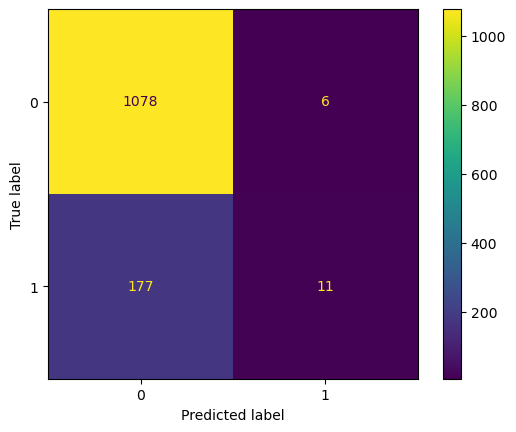

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

    In the above Confusion matrix we can observe that the number of `true positives` and number of `true negatives` is significantly much higher than number of false positives and false negatives
    - which is a good sign for a good classification model!!!

In [20]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average = "weighted")
print(classification_report(y_pred, y_test))
print("Accuracy:", accuray)
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1255
           1       0.06      0.65      0.11        17

    accuracy                           0.86      1272
   macro avg       0.53      0.75      0.51      1272
weighted avg       0.98      0.86      0.91      1272

Accuracy: 0.8561320754716981
F1 Score: 0.9108765668754882


    - The accuracy of the model is around 85 %

-------------------------------------------------------------------------------------------------------------------

## ChatGPT 3.5 prompts:

### prompt1: 

    Why using logistic regression can be beneficial than any other classification methods
    What problem scenarios can be considered to solve effectively using logistic regression classification

### response:

    Logistic regression is a statistical method used for binary classification tasks, where the target variable has two possible outcomes. While there isn't a universal rule that logistic regression is always superior to other classification methods, it does have several benefits in certain scenarios:

1. **Interpretability**: Logistic regression provides easy interpretability of the results. The coefficients obtained from logistic regression can be interpreted as the effect of each feature on the log-odds of the outcome. This makes it particularly useful when the interpretability of the model is important, such as in medical or social sciences.

2. **Efficiency with Small Datasets**: Logistic regression can perform well with small datasets. It's less prone to overfitting compared to more complex models like decision trees or neural networks, especially when the number of features is relatively small.

3. **Efficiency with Linearly Separable Data**: When the classes are linearly separable, logistic regression tends to perform well and converge quickly. Linear separability means that the two classes can be separated by a straight line (or hyperplane in higher dimensions).

4. **No Assumptions About Feature Distribution**: Logistic regression does not require the features to have a normal distribution or to be scaled in a specific way. This makes it less sensitive to feature scaling compared to some other algorithms like Support Vector Machines.

5. **Regularization**: Logistic regression can be easily regularized to prevent overfitting, by adding penalties like L1 or L2 regularization to the cost function. This helps in dealing with multicollinearity and reducing model complexity.

6. **Probabilistic Output**: Logistic regression models output probabilities which can be directly interpreted as the probability of belonging to a particular class. This is particularly useful in scenarios where not only the class label is important, but also the confidence associated with the prediction.

Logistic regression is particularly effective in scenarios such as:

1. **Medical Diagnostics**: Predicting whether a patient has a particular disease based on various medical tests and patient characteristics.
  
2. **Customer Churn Prediction**: Determining whether a customer is likely to churn or continue using a service based on their past behavior and demographic information.

3. **Credit Risk Analysis**: Assessing the risk associated with extending credit to a customer based on their credit history and financial information.

4. **Employee Attrition Prediction**: Predicting whether an employee is likely to leave a company based on various factors such as job satisfaction, salary, and work-life balance.

5. **Marketing Response Prediction**: Predicting whether a customer will respond positively to a marketing campaign based on their demographic information and past interactions with the company.

In these scenarios, logistic regression can provide accurate predictions while maintaining interpretability and efficiency, making it a popular choice for classification tasks. However, it's essential to evaluate different algorithms and choose the one that best suits the specific problem and data characteristics.

------------------------------------------------------------------------------------------------------------------

### prompt2:  

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1255
           1       0.06      0.65      0.11        17

    accuracy                           0.86      1272
   macro avg       0.53      0.75      0.51      1272
weighted avg       0.98      0.86      0.91      1272

Accuracy: 0.8561320754716981
F1 Score: 0.9108765668754882

the above are the stats of a logistic regression model performance what can be concluded and are there any better ways or approaches for improvement
    
    
### response:
        
From the provided statistics, we can make several observations about the performance of the logistic regression model:

1. **Accuracy**: The overall accuracy of the model is 85.6%, which indicates that it correctly classifies approximately 85.6% of the instances in the dataset. However, accuracy alone may not provide a complete picture of the model's performance, especially in imbalanced datasets.

2. **Precision and Recall**: Precision measures the ratio of correctly predicted positive observations to the total predicted positives, while recall measures the ratio of correctly predicted positive observations to the all observations in actual class. In this case, the precision for class 1 (the minority class) is low (6%), indicating that when the model predicts the positive class, it is incorrect most of the time. However, the recall for class 1 is relatively higher (65%), indicating that the model is able to identify a significant portion of the actual positive instances, though it also misclassifies many negative instances as positive.

3. **F1-score**: The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. The weighted average F1-score in this case is 0.91, which is relatively high, but it is important to note that the F1-score may not be the most appropriate metric in imbalanced datasets.

4. **Support**: Support refers to the number of actual occurrences of each class in the dataset. In this case, there are 1255 instances of class 0 and only 17 instances of class 1, indicating a significant class imbalance.

Based on these observations, we can conclude that while the logistic regression model achieves high accuracy and F1-score, it performs poorly in terms of precision for the minority class. This imbalance in precision and recall indicates that the model may not be effectively capturing the characteristics of the minority class.

To improve the performance of the logistic regression model or explore alternative approaches, several strategies can be considered:

1. **Address Class Imbalance**: Since the dataset is imbalanced with a small number of instances in the minority class, techniques such as oversampling, undersampling, or generating synthetic samples using techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be employed to balance the class distribution.

2. **Feature Engineering**: Feature engineering techniques can be used to extract more informative features from the data, which may improve the model's ability to discriminate between classes.

3. **Hyperparameter Tuning**: Fine-tuning hyperparameters of the logistic regression model, such as regularization strength, can help improve its performance.

4. **Ensemble Methods**: Ensemble methods like Random Forest, Gradient Boosting, or stacking can be used to combine multiple classifiers to improve predictive performance.

5. **Model Selection**: It's also worth exploring other classification algorithms such as Support Vector Machines, Random Forest, Gradient Boosting, or Neural Networks to see if they can achieve better performance compared to logistic regression.

6. **Threshold Adjustment**: Adjusting the classification threshold may also help balance precision and recall, especially in imbalanced datasets.

7. **Error Analysis**: Conducting a thorough error analysis to understand the types of errors made by the model can provide insights into areas for improvement.

By implementing these strategies and experimenting with different approaches, it's possible to enhance the performance of the classification model beyond what logistic regression alone can achieve.

[GitHub Repo Link - mshreeram](https://github.com/mshreeram/IML-Assignment-2/blob/main/heart%20disease.ipynb)